In [36]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

## 1. Logistic regression

**Question** What is logistic regression? Does it really solve the regression problems?

Logistic regression is based on logit function which is a defined as log(odds), where odds is the share of the probability of "one" (p) and the probability of "zero" (1-p):

$$
\text{odds}(p) = \frac{p}{1 - p}
$$

The logit function is the natural logarithm of the odds:

$$
\text{logit}(p) = \ln(\text{odds}(p)) = \ln\left(\frac{p}{1 - p}\right)
$$

**Example** We take at random one card from full deck of cards. We define success as taking a heart card. What are the values of probability of success, ODDS and logit in this example? <br/>

**Task** Generate in python two plots visualising the relation between: 
* probability and odds
* probability and logit

What is the value range for thise 3 functions (probability, odds and logit)?

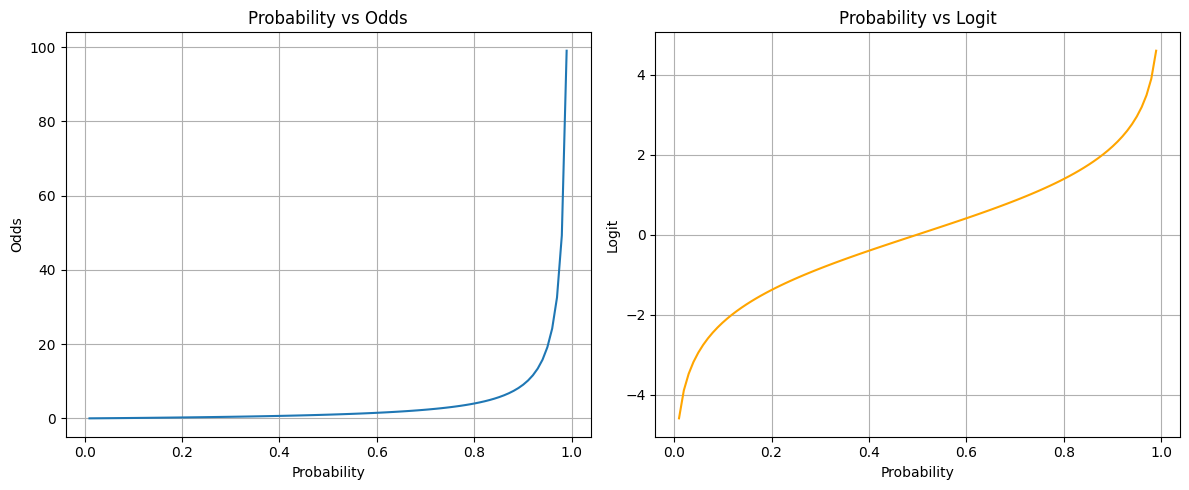

In [37]:
# Define a range of probabilities from 0.01 to 0.99 to avoid division by zero in odds calculation
probabilities = np.linspace(0.01, 0.99, 100)

odds = probabilities / (1 - probabilities)
logit = np.log(odds)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(probabilities, odds, label='Odds')
plt.xlabel('Probability')
plt.ylabel('Odds')
plt.title('Probability vs Odds')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(probabilities, logit, color='orange', label='Logit')
plt.xlabel('Probability')
plt.ylabel('Logit')
plt.title('Probability vs Logit')
plt.grid(True)

plt.tight_layout()
plt.show()


## 2. Simple logistic regression
Let's start with simple logistic regression - with only one independent variable. We will work on the example from english Wikipedia (https://en.wikipedia.org/wiki/Logistic_regression). We want to build a logistic regression model for estimating probability od passing an exam based on the time spent on studying:


|Hours|	0.50|0.75|1.00|1.25|1.50|1.75|1.75|2.00|2.25|2.50|2.75|3.00|3.25|3.50|4.00|4.25|4.50|4.75|5.00|5.50|
|-----|-----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
|Pass |0    |0   |0   |0   |0   |0   |1   |0   |1   |0   |1   |0   |1   |0   |1   |1   |1   |1   |1   |1   |

1 - student passed, 0 - student failed

In [38]:
hours = [0.5, 0.75, 1, 1.25, 1.5, 1.75, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 4, 4.25, 4.5, 4.75, 5, 5.5]
hours = np.array(hours).reshape(-1, 1)
passed = [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]

Let's use the scatter plot to visualize our data. Can you intuitively find a threshold - after how long studying students usually pass the test?

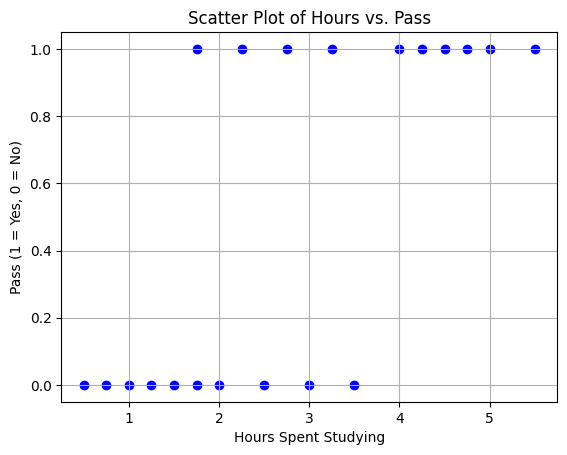

In [39]:
plt.scatter(hours, passed, color='blue')
plt.title("Scatter Plot of Hours vs. Pass")
plt.xlabel("Hours Spent Studying")
plt.ylabel("Pass (1 = Yes, 0 = No)")
plt.grid(True)
plt.show()

We define the logit function as the linear combination of independent variables. In simple regression case we have only one variable x:

$$
\text{logit}(p) = \ln\left(\frac{p}{1 - p}\right) = \beta_0 + \beta_1 \cdot x
$$

The estimated odds value is equal to:

$$
\frac{p}{1 - p} = e^{\beta_0 + \beta_1 \cdot x}
$$

The estimation of $\beta$ coefficient is being done with the maximum likelihood estimation method (https://online.stat.psu.edu/stat415/lesson/1/1.2).

**Task** Use Logistic Regression from scikit learn to obtain the regression coefficients in our problem.

Intercept (beta_0): -3.1400456494011726
Coefficient (beta_1): 1.148811834553649


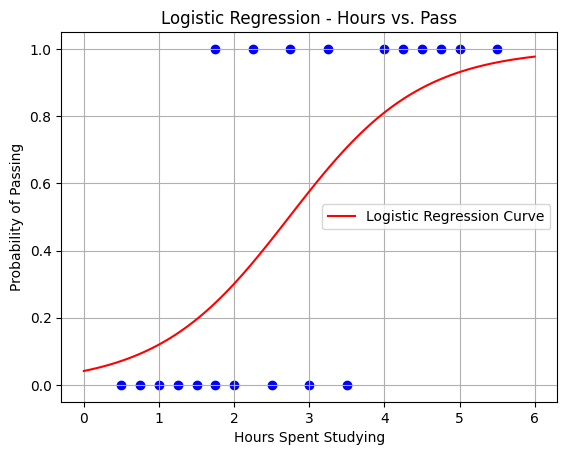

In [40]:
passed = np.array(passed)

model = LogisticRegression()
model.fit(hours, passed)

beta_0 = model.intercept_[0]
beta_1 = model.coef_[0][0]

print(f"Intercept (beta_0): {beta_0}")
print(f"Coefficient (beta_1): {beta_1}")

plt.scatter(hours, passed, color='blue')
x_values = np.linspace(0, 6, 100)
y_values = 1 / (1 + np.exp(-(beta_0 + beta_1 * x_values)))  # logistic function
plt.plot(x_values, y_values, color='red', label='Logistic Regression Curve')
plt.title("Logistic Regression - Hours vs. Pass")
plt.xlabel("Hours Spent Studying")
plt.ylabel("Probability of Passing")
plt.grid(True)
plt.legend()
plt.show()

**Question** Having the coefficients how can we determine what is the probability that student who studied for 4.25h will pass the test?

**Task** Write the body of function which calculates this probability having the $\beta_0$ and $\beta_1$ coefficients and the study time (x). Using this function and coefficients obtained with previous task find the answer for previous question (the probability of passing the test after 4.25 hours of studying). <br/>
_Tip: np.exp() function can be useful_

In [41]:
def calculate_probability(beta_0, beta_1, x):
    odds = np.exp(beta_0 + beta_1 * x)
    p = odds / (1 + odds)
    return p

probability = calculate_probability(beta_0, beta_1, 4.25)
print(f"The probability of passing the test after 4.25 hours of studying is: {probability:.4f}")


The probability of passing the test after 4.25 hours of studying is: 0.8510


**Task** Let's visualize the probability function - p(studying hours), to your previous scatter add a line showing the relation between studying time and the probability of passing. Can you see something interesting about this function? Do you know how this type of function is called?

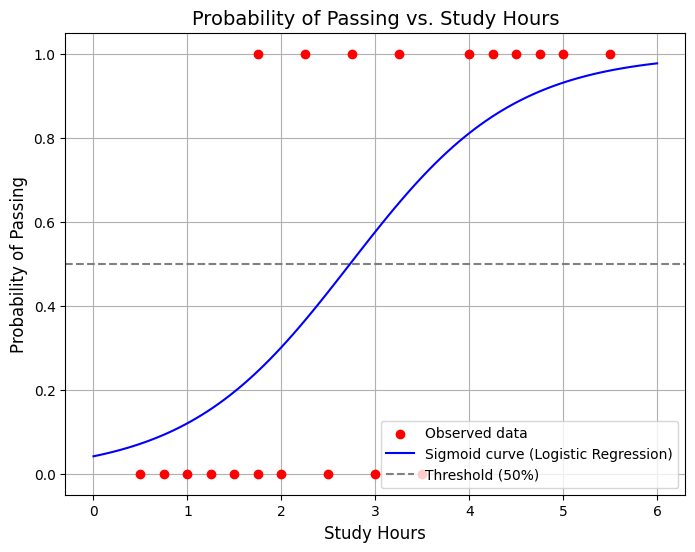

In [42]:
x_values = np.linspace(0, 6, 100)
y_values = calculate_probability(beta_0, beta_1, x_values)

plt.figure(figsize=(8, 6))
plt.scatter(hours, passed, color='red', label='Observed data', zorder=5)
plt.plot(x_values, y_values, color='blue', label='Sigmoid curve (Logistic Regression)', zorder=3)

plt.title("Probability of Passing vs. Study Hours", fontsize=14)
plt.xlabel("Study Hours", fontsize=12)
plt.ylabel("Probability of Passing", fontsize=12)
plt.axhline(0.5, color='gray', linestyle='--', label='Threshold (50%)')
plt.legend()
plt.grid(True)

plt.show()

Let's check if the probability which we calculated is the same as this returned with out fit logistic regression model from scikit learn. Use predict_proba function to find the probability of studying 4.25h. <br/>
_Tip: predict_proba requires 2D array or list of lists as input, so [[4.25]] should be passed_

In [43]:
model = LogisticRegression()
model.fit(hours, passed)

predicted_probability = model.predict_proba([[4.25]])[0][1]  # [0][1] to get the probability of passing

print(f"Predicted probability of passing after 4.25 hours of studying: {predicted_probability:.4f}")


Predicted probability of passing after 4.25 hours of studying: 0.8510


We may also not want to obtain the probabilities, but just the more probable class (whether student will pass or not). To obtain this class use the predict function on the model:

In [44]:
predicted_class = model.predict([[4.25]])

print(f"Predicted class for 4.25 hours of studying: {'Pass' if predicted_class[0] == 1 else 'Fail'}")


Predicted class for 4.25 hours of studying: Pass


## 3. Multiple logistic regression

More usual real-world case is to use the multiple logistic regression, when the value of some binary class depends on more than one factor. In this part we will work on the dataset containing data about whether given person is diabetic or not.

Let's start with reading the data from "diabetes_scaled.csv" file. The data have already been scaled.

In [45]:
data = pd.read_csv("diabetes_scaled.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


Firstly, we add the intercept column (value equal to 1 for all rows), just for easier futher analysis.

In [46]:
data['intercept'] = 1

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,intercept
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0,1
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0,1
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1,1


Next, we divide our data into train and test. Let's just leave last 100 cases in the test set, the remaining ones will be the training examples.

In [47]:
split_index = len(data) - 100

train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]

print(f"Training set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")

Training set size: 668
Test set size: 100


Use the scikit learn implementation of te logistic regression to build the model on the training set. What are the obtained regression coefficients?

In [48]:
X_train = train_data.drop(columns=['Class'])
y_train = train_data['Class']

model = LogisticRegression()
model.fit(X_train, y_train)

coefficients = model.coef_[0]
intercept = model.intercept_[0]

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: -0.8796205182318984
Coefficients: [ 0.44980174  1.03283414 -0.25579399  0.0252127  -0.10118449  0.75785671
  0.34360905  0.13162502  0.00940739]


Now, evaluate your model on the test examples. Classify the test examples, find the probabilitiy of diabetes desease for each test case and the overall accuracy score.

In [49]:
X_test = test_data.drop(columns=['Class'])
y_test = test_data['Class']

y_pred = model.predict(X_test)

y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)

print("Overall accuracy score:", accuracy)

Overall accuracy score: 0.8
